<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
#!pip install yfinance
#!pip install finta

# 載入資料

提示詞:使用yfinance和datetime模組取得近20年的^TWII資料並命名為df

In [119]:
import yfinance as yf
from datetime import datetime, timedelta

# 設定起始日期為10年前的今天
start_date = (datetime.now() - timedelta(days=365*20)).strftime("%Y-%m-%d")

# 使用yfinance取得^TWII的資料
df = yf.download("^TWII", start=start_date)

# 將日期轉換成ISO 8601格式
df.index = df.index.strftime("%Y-%m-%dT%H:%M:%S")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-03-03T00:00:00,4483.439941,4546.850098,4472.169922,4526.689941,4526.673340,2435200
2003-03-04T00:00:00,4481.549805,4515.970215,4476.549805,4499.689941,4499.673340,2346800
2003-03-05T00:00:00,4457.459961,4475.970215,4411.970215,4418.109863,4418.093750,2514400
2003-03-06T00:00:00,4443.339844,4451.399902,4385.580078,4397.439941,4397.423828,2251000
2003-03-07T00:00:00,4352.729980,4403.390137,4312.279785,4350.589844,4350.573730,2210200
...,...,...,...,...,...,...
2023-02-20T00:00:00,15452.009766,15575.320312,15436.660156,15551.230469,15551.230469,2994900
2023-02-21T00:00:00,15535.639648,15567.740234,15496.730469,15563.000000,15563.000000,2997300
2023-02-22T00:00:00,15541.169922,15541.169922,15345.929688,15418.769531,15418.769531,2881300


# Label

我要製作一個函數名稱叫做add_label_column
輸入參數為:df,shift_day,lb,ub
其中df是一個dataframe,此dataframe之index為時間並且有一個欄位名叫'Close'
add_label_column函數內部要做的事情如下:
增加一個欄位叫做'signal',其中該欄位的數值計算方式如下:
若未來shift_day後的Close 大於 當前Close*ub則為 1
若未來shift_day後的Close 小於 當前Close*lb則為 -1
其他情況則預設為0
最後 return 增加過'signal'欄位的df

In [120]:
def add_label_column(df, shift_day, lb, ub):
    # 建立一個名為 'signal' 的新欄位，並初始化為 0
    df['signal'] = 0
    
    # 計算 Close 的 shift_day 天後的值，並將其儲存在 'future_close' 欄位中
    df['future_close'] = df['Close'].shift(-shift_day)
    
    # 判斷未來的 Close 是否大於或小於當前 Close 的上下限門檻，如果是，則在 'signal' 欄位中設置對應的值
    df.loc[df['future_close'] > df['Close'] * ub, 'signal'] = 1
    df.loc[df['future_close'] < df['Close'] * lb, 'signal'] = 2
    
    # 刪除 'future_close' 欄位，因為它只是用於計算 'signal' 值，不需要保留
    df = df.drop('future_close', axis=1)
    
    # 返回新增 'signal' 欄位後的 DataFrame
    return df
df = add_label_column(df, shift_day=5, lb=0.99, ub=1.01)
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,signal
Date,,,,,,,
2023-01-30T00:00:00,15291.530273,15493.820312,15291.530273,15493.820312,15493.820312,3697500,0
2023-01-31T00:00:00,15419.209961,15441.980469,15265.200195,15265.200195,15265.200195,3357200,0
2023-02-01T00:00:00,15346.349609,15420.129883,15291.679688,15420.129883,15420.129883,3009800,1
2023-02-02T00:00:00,15508.830078,15602.089844,15496.519531,15595.160156,15595.160156,3248500,0
2023-02-03T00:00:00,15591.950195,15617.730469,15504.030273,15602.660156,15602.660156,2647300,0
2023-02-06T00:00:00,15514.799805,15514.799805,15392.820312,15392.820312,15392.820312,2320600,0
2023-02-07T00:00:00,15376.120117,15462.099609,15363.650391,15400.910156,15400.910156,2251800,1
2023-02-08T00:00:00,15538.709961,15631.219727,15520.049805,15618.169922,15618.169922,2514500,2
2023-02-09T00:00:00,15590.000000,15617.339844,15553.839844,15598.709961,15598.709961,2236100,0


# 檢查Label

我有一個dataframe其中有一個欄位叫做signal有三個類別(-1,0,1)
請幫我可視化該欄位每個類別的數量,用直方圖呈現

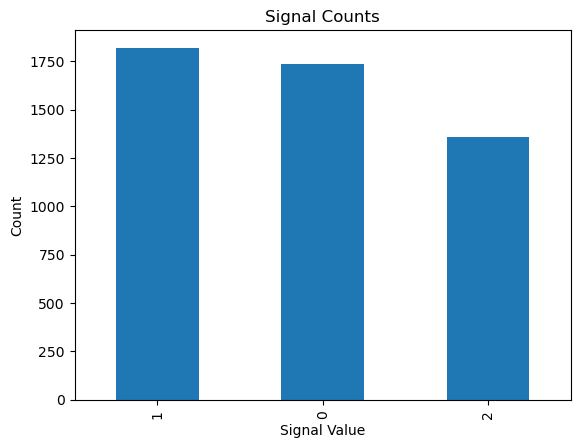

In [121]:
import matplotlib.pyplot as plt

# 繪製直方圖
df['signal'].value_counts().plot(kind='bar')

# 設置標題和標籤
plt.title('Signal Counts')
plt.xlabel('Signal Value')
plt.ylabel('Count')

# 顯示圖形
plt.show()

# 檢查Label V2

我有一個dataframe名為df內含一個欄位名為Close和一個欄位名為signal
新增一個變量名為df_recent代表最近100天的df資料
然後根據df_recent用matplotlib畫圖
繪製Close之折線圖
然後命名一個變量為buy和一個變量為sell
分別代表的意義為df的signal為1時的Close序列和df的signal為2時的Close序列
並用plt.scatter繪圖
其中針對buy序列顏色用紅色圖案用向上箭頭
其中針對sell序列顏色用黑色圖案用向下箭頭


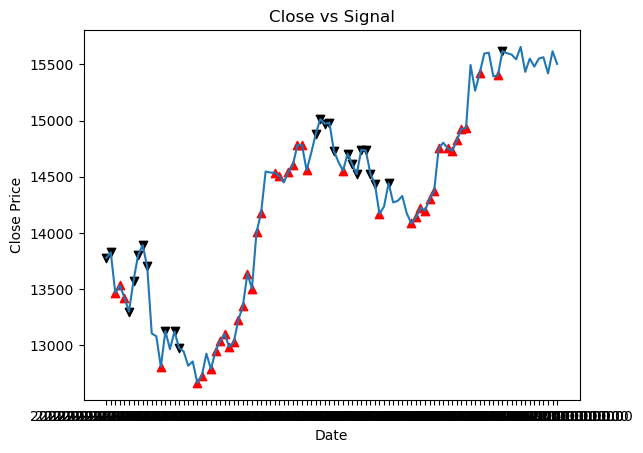

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設您已經讀取並處理好了原始資料，並存儲在 df 中
# 下面是創建 df_recent 的程式碼
df_recent = df.tail(100)

# 繪製 Close 之折線圖
plt.plot(df_recent['Close'])

# 繪製 buy 和 sell 的散點圖
buy = df_recent[df_recent['signal'] == 1]['Close']
sell = df_recent[df_recent['signal'] == 2]['Close']
plt.scatter(buy.index, buy.values, c='r', marker='^')
plt.scatter(sell.index, sell.values, c='k', marker='v')

# 設定圖形標題和軸標籤
plt.title('Close vs Signal')
plt.xlabel('Date')
plt.ylabel('Close Price')

# 顯示圖形
plt.show()


# 計算技術指標RSI 1

我有一個dataframe名為df
請新增一個欄位叫做RSI
該欄位使用finta的RSI技術指標函數製作
製作完畢繪製其分布圖

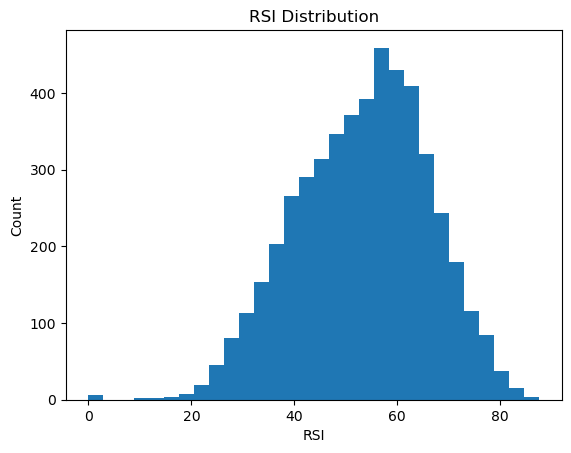

In [123]:
import finta
import pandas as pd
from finta import TA
import seaborn as sns


# 使用finta函式庫中的RSI指標函數來計算RSI值
df['RSI'] = finta.TA.RSI(df)

# 繪製RSI值的分布圖
import matplotlib.pyplot as plt

plt.hist(df['RSI'], bins=30)
plt.title('RSI Distribution')
plt.xlabel('RSI')
plt.ylabel('Count')
plt.show()


# 計算威廉指標 2

我有一個dataframe名為df 請新增一個欄位叫做'Williams %R' 該欄位使用finta的WILLIAMS技術指標函數製作,傳入參數為df,製作完畢繪製其分布圖

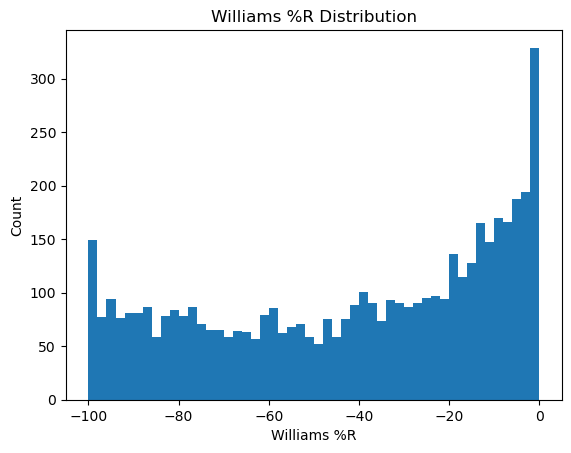

In [124]:
# 使用 finta 的 williams_r 函數，計算 Williams %R 值
df['Williams %R'] = TA.WILLIAMS(df)

# 繪製分布圖
plt.hist(df['Williams %R'], bins=50)
plt.title('Williams %R Distribution')
plt.xlabel('Williams %R')
plt.ylabel('Count')
plt.show()

# SMA 3

我有一個dataframe名為df代表股價的開高收低量資料,請新增一個欄位叫做SMA,
該欄位使用finta的SMA技術指標函數製作,傳入參數為df,製作完畢繪製其分布圖

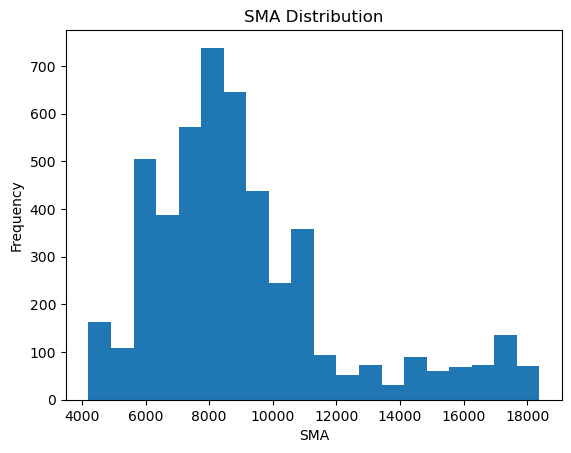

In [125]:
# 假設 df 為已經讀取進來的股價資料 DataFrame
# 以下為計算SMA指標的程式碼
df['SMA'] = finta.TA.SMA(df, 10)  # 以10日的周期計算SMA

# 繪製分布圖
plt.hist(df['SMA'], bins=20)  # 將SMA值分為20組進行分布繪圖
plt.title('SMA Distribution')
plt.xlabel('SMA')
plt.ylabel('Frequency')
plt.show()

# EMA 4

我有一個dataframe名為df代表股價的開高收低量資料,請新增一個欄位叫做EMA, 該欄位使用finta的EMA技術指標函數製作,傳入參數為df,製作完畢繪製其分布圖

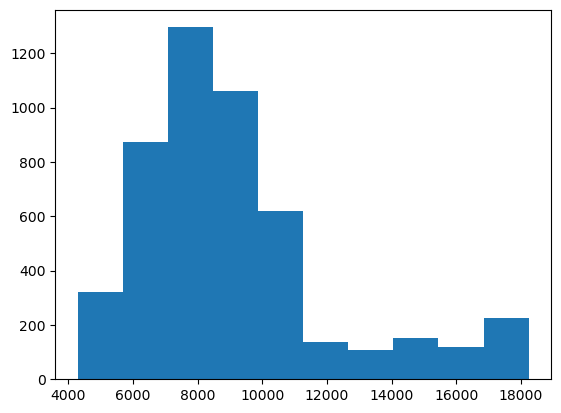

In [126]:
df['EMA'] = TA.EMA(df, period=20)

# 繪製 EMA 的分布圖
import matplotlib.pyplot as plt
plt.hist(df['EMA'])
plt.show()

# WMA 5

我有一個dataframe名為df代表股價的開高收低量資料,請新增一個欄位叫做WMA, 該欄位使用finta的WMA技術指標函數製作,傳入參數為df,製作完畢繪製其分布圖

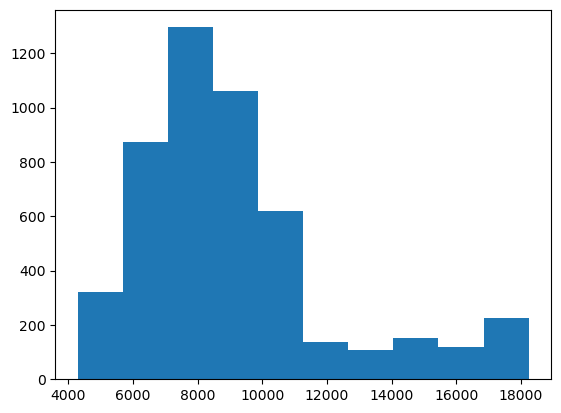

In [127]:
df['WMA'] = TA.WMA(df)

# 繪製 EMA 的分布圖
import matplotlib.pyplot as plt
plt.hist(df['EMA'])
plt.show()

# HMA 6

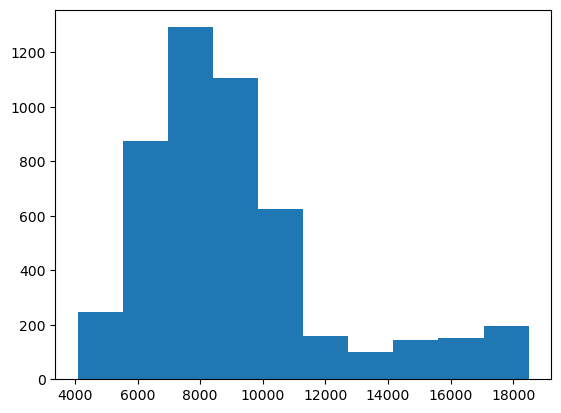

In [128]:
df['HMA'] = TA.HMA(df)
plt.hist(df['HMA'])
plt.show()

# TEMA 7

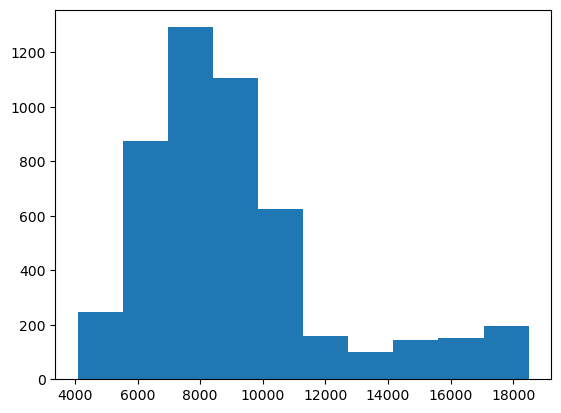

In [129]:
df['TEMA'] = TA.TEMA(df)
plt.hist(df['HMA'])
plt.show()

# CCI 8

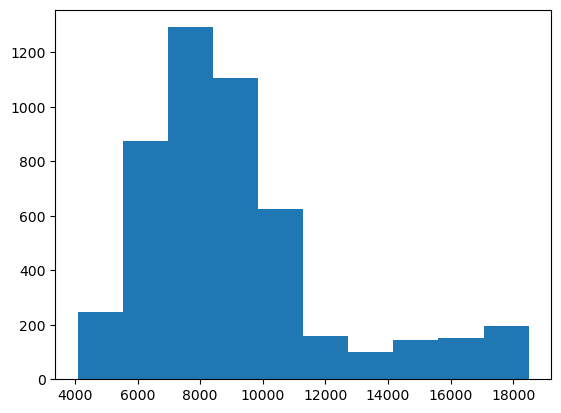

In [130]:
df['CCI'] = TA.CCI(df)
plt.hist(df['HMA'])
plt.show()

# CMO 9

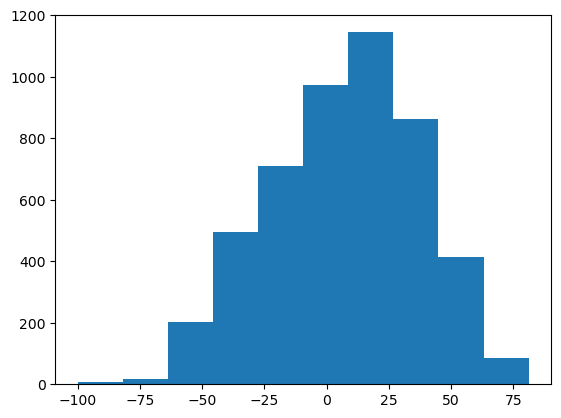

In [131]:
df['CMO'] = TA.CMO(df)
plt.hist(df['CMO'])
plt.show()

# MACD 10

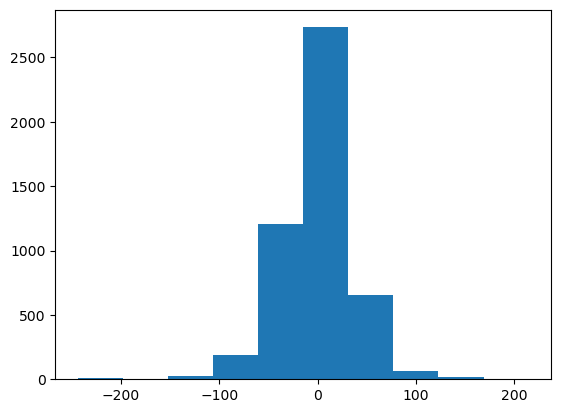

In [132]:
df['MACD'] = TA.MACD(df)['MACD'] - TA.MACD(df)['SIGNAL']
plt.hist(df['MACD'])
plt.show()

# PPO 11

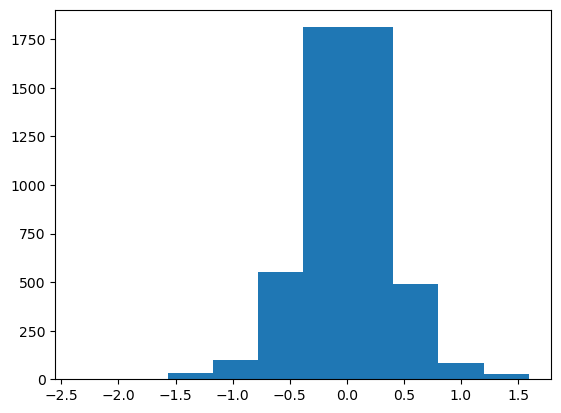

In [133]:
df['PPO'] = TA.PPO(df)['PPO'] - TA.PPO(df)['SIGNAL']
plt.hist(df['PPO'])
plt.show()

# ROC 12

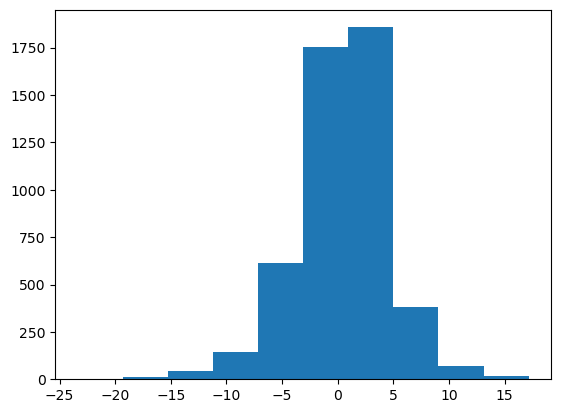

In [134]:
df['ROC'] = TA.ROC(df)
plt.hist(df['ROC'])
plt.show()

# CMFI 13

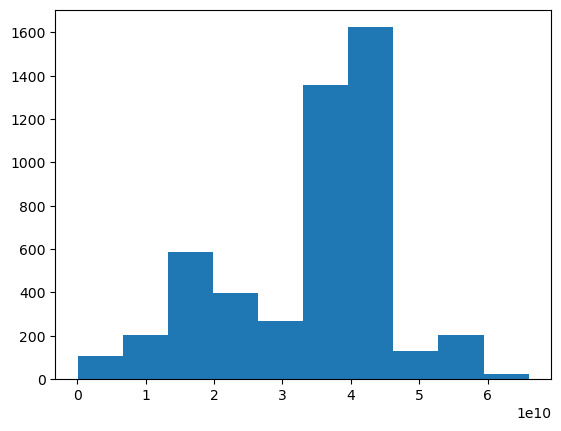

In [135]:
df['CFI'] = TA.CFI(df)
plt.hist(df['CFI'])
plt.show()

# DMI 14

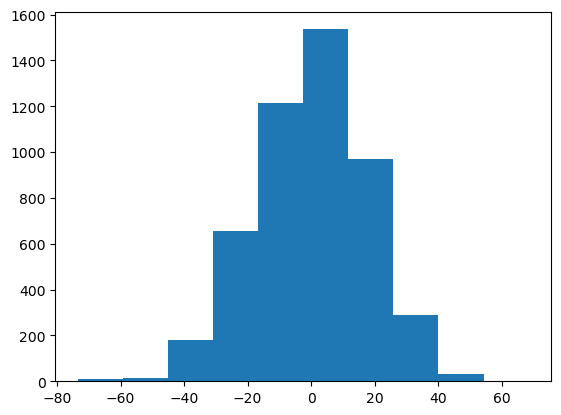

In [136]:
df['DMI'] = TA.DMI(df)['DI+'] - TA.DMI(df)['DI-']
plt.hist(df['DMI'])
plt.show()

# SAR 15

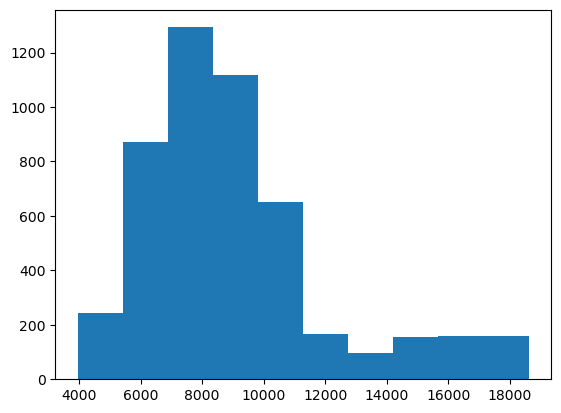

In [137]:
df['SAR'] = TA.SAR(df)
plt.hist(df['SAR'])
plt.show()

# columns選取

請做一個函式其傳入參數為df,內部做幾件事情:
1.刪除df有缺失值的row
2.僅保留df內這些欄位['RSI','Williams %R','SMA','EMA','WMA','HMA','TEMA','CCI','CMO','MACD','PPO','ROC','CFI','DMI','SAR','signal']

In [138]:
def clean_and_filter_df(df):
    # 刪除有缺失值的 row
    df = df.dropna()
    
    # 保留指定欄位
    keep_columns = ['RSI','Williams %R','SMA','EMA','WMA','HMA','TEMA','CCI','CMO','MACD','PPO','ROC','CFI','DMI','SAR','signal']
    df = df[keep_columns]
    
    return df
df = clean_and_filter_df(df)
df.head()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,signal
Date,,,,,,,,,,,,,,,,
2003-03-27T00:00:00,52.606407,-27.871732,4515.492041,4482.139676,4529.482042,4583.962827,4535.702581,33.990332,6.353153,4.808759,0.106954,5.956883,7.159906e+08,-7.005115,4432.728661,2
2003-03-28T00:00:00,49.022986,-37.685239,4515.576025,4481.574792,4520.911762,4564.095112,4510.367452,24.031865,-2.877989,1.116379,0.024548,3.439342,7.294839e+08,-5.120624,4455.198820,0
2003-03-31T00:00:00,37.509132,-81.724406,4511.899023,4464.176073,4478.538694,4519.633739,4417.109468,-74.736578,-30.802831,-9.614036,-0.214805,-1.319254,6.823930e+08,-30.843309,4619.979980,1
2003-04-01T00:00:00,39.128883,-81.943830,4491.687988,4450.623203,4444.299110,4463.936633,4366.583157,-94.391238,-26.549566,-14.986237,-0.335525,-3.095505,6.487898e+08,-31.142023,4619.979980,1
2003-04-02T00:00:00,37.466635,-89.503486,4471.337012,4435.906437,4408.793121,4404.090662,4323.735528,-82.660965,-30.538369,-19.019018,-0.427022,-1.065403,6.134421e+08,-24.882417,4606.196387,1


# features scaling

請使用sklearn套件對df做MinMaxScaler轉換
其中df裡面有個欄位叫做signal此欄位不必轉換

In [139]:
from sklearn.preprocessing import MinMaxScaler

# 創建 MinMaxScaler 物件
scaler = MinMaxScaler()

# 將 DataFrame 中的所有欄位（除了 'signal'）進行縮放
columns_to_scale = [col for col in df.columns if col != 'signal']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,signal
Date,,,,,,,,,,,,,,,,
2003-03-27T00:00:00,0.549432,0.721283,0.021946,0.013430,0.022717,0.034137,0.029887,0.550705,0.553780,0.542373,0.623701,0.723410,0.002862,0.540536,0.032549,2
2003-03-28T00:00:00,0.503278,0.623148,0.021952,0.013390,0.022112,0.032757,0.028129,0.538671,0.498704,0.534327,0.602832,0.661292,0.003068,0.555863,0.034081,0
2003-03-31T00:00:00,0.354981,0.182756,0.021693,0.012142,0.019125,0.029668,0.021658,0.419315,0.332095,0.510943,0.542218,0.543879,0.002349,0.346654,0.045318,1
2003-04-01T00:00:00,0.375843,0.180562,0.020268,0.011169,0.016710,0.025799,0.018152,0.395563,0.357471,0.499235,0.511646,0.500052,0.001836,0.344225,0.045318,1
2003-04-02T00:00:00,0.354434,0.104965,0.018832,0.010114,0.014207,0.021642,0.015179,0.409739,0.333673,0.490447,0.488475,0.550143,0.001296,0.395136,0.044378,1


# Xs ,ys prepare

我有一個df其中除了'singal'以外其他欄位都是特徵算一算總共有15個特徵
我要你寫程式幫忙做到以下幾點事情:
1.對df使用for迴圈遍歷
2.在每一個循環中每15個row配特徵欄位,製作成一個二維矩陣然後append至一個叫Xs的list
3.在每一個循環中對應第三點15個row往後一個row的資料對應的signal,append至一個叫ys的list中
4.最後將Xs和ys轉換成numpy array格式

In [140]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# 假設你的資料框為 df
n_features = 15

# 創建 Xs 和 ys 列表
Xs = []
ys = []

# 使用 for 迴圈遍歷 df，每15個row配特徵欄位，製作成一個二維矩陣然後append至Xs，對應的signal,append至ys
for i in tqdm(range(0, len(df) - n_features)):
    X = df.iloc[i:i+n_features, :-1].values # 取出15個row的特徵欄位，並轉換成矩陣格式
    y = df.iloc[i+n_features, -1] # 取出對應的 signal 值
    Xs.append(X)
    ys.append(y)

# 將 Xs 和 ys 轉換成 numpy array 格式
Xs = np.array(Xs)
ys = np.array(ys)
print(Xs.shape,ys.shape)

100%|████████████████████████████████████████████████████████████████████████████| 4879/4879 [00:03<00:00, 1474.52it/s]

(4879, 15, 15) (4879,)


我有一個shape為(1226, 15, 15)的X_batch和shape為(1226,)的y_batch
請繪圖該圖描述如下:
1.繪製9張圖排成一個九宮格形狀
2.每一張圖代表一個X實例為15x15的矩陣,在此圖上面給標註對應的y

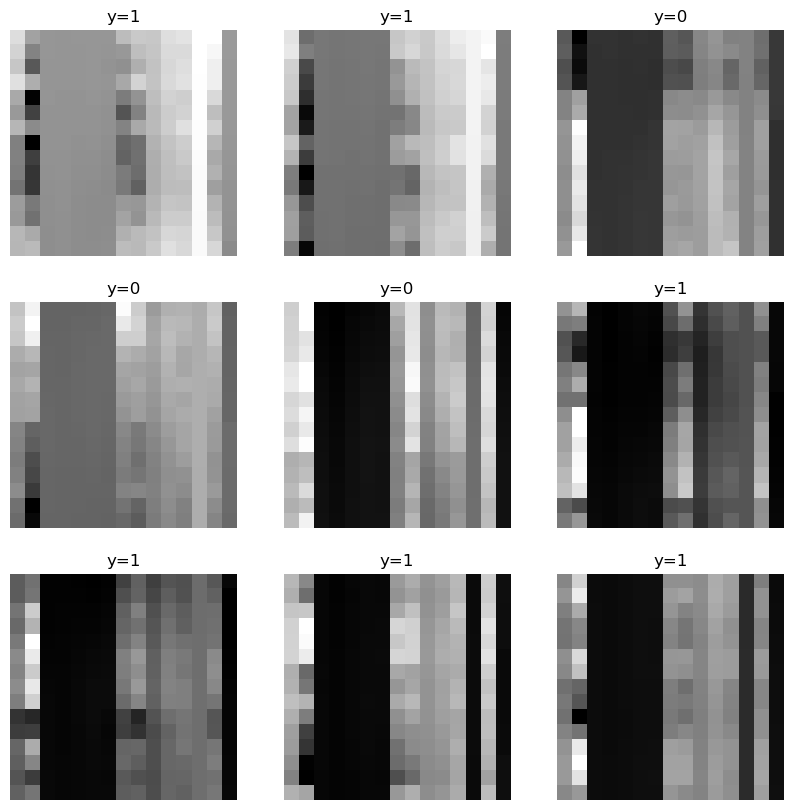

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# 將 X_batch 轉換為一個 3 維數組，形狀為 (1226, 15, 15, 1)
X_batch = np.expand_dims(Xs, axis=-1)
y_batch = ys

# 繪製 9 張圖
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        # 隨機選擇一個 X 實例
        idx = np.random.randint(X_batch.shape[0])
        x = X_batch[idx, :, :, 0]
        y = y_batch[idx]
        
        # 繪製圖像
        ax[i, j].imshow(x, cmap='gray')
        ax[i, j].set_title(f"y={y}")
        ax[i, j].axis('off')

plt.show()


# Split training and test sets

我有一個list叫Xs和一個list叫做ys
請對Xs做一下操作
1.將Xs前70%當作訓練集切分出來命為為X_train
2.將Xs70%至85%切分出來命名為X_val
3.將Xs85%以後切分出來命名為X_test
然後對ys也是類似操作
之後將所有變量的shape打印出來

各取其最後40筆資料當作X_test和y_test 其餘當作X_train和y_train,並將以上變量的shape print出來

In [142]:
# 切分 Xs
X_train = Xs[:int(0.7*len(Xs))]
X_val = Xs[int(0.7*len(Xs)):int(0.85*len(Xs))]
X_test = Xs[int(0.85*len(Xs)):]

# 切分 ys
y_train = ys[:int(0.7*len(ys))]
y_val = ys[int(0.7*len(ys)):int(0.85*len(ys))]
y_test = ys[int(0.85*len(ys)):]

# 打印 shape
print("X_train shape:", len(X_train))
print("X_val shape:", len(X_val))
print("X_test shape:", len(X_test))

print("y_train shape:", len(y_train))
print("y_val shape:", len(y_val))
print("y_test shape:", len(y_test))


X_train shape: 3415
X_val shape: 732
X_test shape: 732
y_train shape: 3415
y_val shape: 732
y_test shape: 732


# y one hot encoding

我有個變量y_train是list型態數值只有-1,0,1三種可能,請做one hot encoding
然後還有y_val和y_test也做一樣操作
最後我想知道每個變量每個類別的count有多少

In [143]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# 將 y_train、y_val 和 y_test 轉換成 numpy array
y_train = np.array(y_train).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# 使用 OneHotEncoder 進行 one hot encoding
encoder = OneHotEncoder(categories=[[0, 1, 2]], sparse=False)
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)
y_test_encoded = encoder.transform(y_test)

# 計算每個類別的 count
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_val, counts_val = np.unique(y_val, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("y_train class counts:", dict(zip(unique_train, counts_train)))
print("y_val class counts:", dict(zip(unique_val, counts_val)))
print("y_test class counts:", dict(zip(unique_test, counts_test)))


y_train class counts: {0: 1122, 1: 1291, 2: 1002}
y_val class counts: {0: 352, 1: 226, 2: 154}
y_test class counts: {0: 255, 1: 288, 2: 189}


# CNN

使用keras幫我建立一個神經網路 
有幾點要考慮的 
1.輸入為15x15的二維矩陣數值都落在0到1之間
2.row axis 代表時間,columns axis 代表股價的技術指標數值
3.輸出為三種類別  
4.此資料集容易overfitting  
5.我希望裡面加入卷積神經網路和注意力機制
請根據以上幾點設計一個模型並編譯

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# 創建一個序列模型
model = Sequential()

# 添加第一個卷積層，使用32個3x3的卷積核，使用ReLU激活函數，並指定輸入形狀
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)))

# 添加第二個卷積層，使用64個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(64, (3, 3), activation='relu'))

# 添加第三個卷積層，使用128個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(128, (3, 3), activation='relu'))

# 添加平坦層，將卷積層的輸出展開為一維數組
model.add(Flatten())

# 添加dropout層，防止過度擬合
model.add(Dropout(0.5))

# 添加全連接層，使用softmax激活函數，輸出3個類別
model.add(Dense(3, activation='softmax'))

# 編譯模型，使用交叉熵損失函數和Adam優化器
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 打印模型結構
model.summary()


請幫我利用class_weight參數設置的方式訓練keras模型來解決類別不平衡的問題

In [ ]:
from sklearn.utils import class_weight

# Calculate class weights

class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train).tolist(),y=y_train.ravel())
class_weights = dict(zip([0,1,2],class_weights))


# Fit the model with class weights
model.fit(X_train, y_train_encoded,
          batch_size=32,
          epochs=1000,
          validation_data=(X_val, y_val_encoded),
          class_weight=class_weights)


Epoch 1/1000
107/107 [==============================] - 1s 7ms/step - loss: 1.1046 - accuracy: 0.3239 - val_loss: 1.0850 - val_accuracy: 0.4809
Epoch 2/1000
107/107 [==============================] - 1s 5ms/step - loss: 1.0939 - accuracy: 0.3813 - val_loss: 1.0839 - val_accuracy: 0.4536
Epoch 3/1000
107/107 [==============================] - 0s 5ms/step - loss: 1.0907 - accuracy: 0.3833 - val_loss: 1.0817 - val_accuracy: 0.4167
Epoch 4/1000
107/107 [==============================] - 1s 5ms/step - loss: 1.0882 - accuracy: 0.3988 - val_loss: 1.0727 - val_accuracy: 0.4358
Epoch 5/1000
107/107 [==============================] - 0s 4ms/step - loss: 1.0860 - accuracy: 0.3956 - val_loss: 1.0757 - val_accuracy: 0.4139
Epoch 6/1000
107/107 [==============================] - 0s 5ms/step - loss: 1.0811 - accuracy: 0.3927 - val_loss: 1.0863 - val_accuracy: 0.4180
Epoch 7/1000
107/107 [==============================] - 0s 5ms/step - loss: 1.0827 - accuracy: 0.3868 - val_loss: 1.0809 - val_accuracy:

107/107 [==============================] - 1s 5ms/step - loss: 0.9870 - accuracy: 0.5101 - val_loss: 1.1689 - val_accuracy: 0.3962
Epoch 58/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.9727 - accuracy: 0.5148 - val_loss: 1.1648 - val_accuracy: 0.3948
Epoch 59/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.9791 - accuracy: 0.5066 - val_loss: 1.1818 - val_accuracy: 0.3975
Epoch 60/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.9731 - accuracy: 0.5174 - val_loss: 1.1513 - val_accuracy: 0.4016
Epoch 61/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.9756 - accuracy: 0.5186 - val_loss: 1.1996 - val_accuracy: 0.3880
Epoch 62/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.9732 - accuracy: 0.5089 - val_loss: 1.1784 - val_accuracy: 0.3648
Epoch 63/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.9671 - accuracy: 0.5236 - val_loss: 1.1706 - val_accuracy: 0.3948

107/107 [==============================] - 0s 5ms/step - loss: 0.8690 - accuracy: 0.5909 - val_loss: 1.2904 - val_accuracy: 0.4098
Epoch 114/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.8582 - accuracy: 0.5845 - val_loss: 1.2785 - val_accuracy: 0.4016
Epoch 115/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.8620 - accuracy: 0.5854 - val_loss: 1.3431 - val_accuracy: 0.3648
Epoch 116/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.8586 - accuracy: 0.5865 - val_loss: 1.2904 - val_accuracy: 0.3716
Epoch 117/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.8565 - accuracy: 0.5985 - val_loss: 1.3251 - val_accuracy: 0.3634
Epoch 118/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.8535 - accuracy: 0.6012 - val_loss: 1.2970 - val_accuracy: 0.3893
Epoch 119/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.8581 - accuracy: 0.5988 - val_loss: 1.3692 - val_accuracy: 

107/107 [==============================] - 0s 4ms/step - loss: 0.7677 - accuracy: 0.6524 - val_loss: 1.4430 - val_accuracy: 0.3852
Epoch 170/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.7647 - accuracy: 0.6448 - val_loss: 1.4216 - val_accuracy: 0.3784
Epoch 171/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.7671 - accuracy: 0.6343 - val_loss: 1.4264 - val_accuracy: 0.3852
Epoch 172/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.7589 - accuracy: 0.6510 - val_loss: 1.4513 - val_accuracy: 0.3702
Epoch 173/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.7638 - accuracy: 0.6501 - val_loss: 1.4628 - val_accuracy: 0.3730
Epoch 174/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.7573 - accuracy: 0.6448 - val_loss: 1.4836 - val_accuracy: 0.3415
Epoch 175/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.7761 - accuracy: 0.6334 - val_loss: 1.4191 - val_accuracy: 

107/107 [==============================] - 1s 5ms/step - loss: 0.7149 - accuracy: 0.6679 - val_loss: 1.5344 - val_accuracy: 0.3743
Epoch 226/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.6791 - val_loss: 1.5486 - val_accuracy: 0.3593
Epoch 227/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.6820 - val_loss: 1.5470 - val_accuracy: 0.3716
Epoch 228/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.6829 - val_loss: 1.5805 - val_accuracy: 0.3593
Epoch 229/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.7027 - accuracy: 0.6723 - val_loss: 1.5342 - val_accuracy: 0.3525
Epoch 230/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.7043 - accuracy: 0.6723 - val_loss: 1.4813 - val_accuracy: 0.3811
Epoch 231/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.6782 - val_loss: 1.5195 - val_accuracy: 

107/107 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.6972 - val_loss: 1.6409 - val_accuracy: 0.3552
Epoch 282/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.6975 - val_loss: 1.6940 - val_accuracy: 0.3757
Epoch 283/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.6494 - accuracy: 0.7034 - val_loss: 1.6676 - val_accuracy: 0.3675
Epoch 284/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.6423 - accuracy: 0.7051 - val_loss: 1.7340 - val_accuracy: 0.3538
Epoch 285/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.6461 - accuracy: 0.7081 - val_loss: 1.6486 - val_accuracy: 0.3525
Epoch 286/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.6397 - accuracy: 0.7083 - val_loss: 1.6376 - val_accuracy: 0.3730
Epoch 287/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.6233 - accuracy: 0.7265 - val_loss: 1.6402 - val_accuracy: 

107/107 [==============================] - 0s 4ms/step - loss: 0.6147 - accuracy: 0.7195 - val_loss: 1.7401 - val_accuracy: 0.3470
Epoch 338/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.6114 - accuracy: 0.7168 - val_loss: 1.8398 - val_accuracy: 0.3607
Epoch 339/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.6319 - accuracy: 0.7104 - val_loss: 1.8164 - val_accuracy: 0.3593
Epoch 340/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.6188 - accuracy: 0.7145 - val_loss: 1.8209 - val_accuracy: 0.3648
Epoch 341/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5988 - accuracy: 0.7324 - val_loss: 1.8520 - val_accuracy: 0.3525
Epoch 342/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.6160 - accuracy: 0.7066 - val_loss: 1.8722 - val_accuracy: 0.3497
Epoch 343/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.6229 - accuracy: 0.7157 - val_loss: 1.8220 - val_accuracy: 

107/107 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.7324 - val_loss: 1.9973 - val_accuracy: 0.3770
Epoch 394/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5786 - accuracy: 0.7312 - val_loss: 1.9389 - val_accuracy: 0.3552
Epoch 395/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.6006 - accuracy: 0.7218 - val_loss: 1.9256 - val_accuracy: 0.3770
Epoch 396/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5927 - accuracy: 0.7236 - val_loss: 1.9538 - val_accuracy: 0.3620
Epoch 397/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5891 - accuracy: 0.7224 - val_loss: 1.9237 - val_accuracy: 0.3825
Epoch 398/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.7426 - val_loss: 1.8867 - val_accuracy: 0.3934
Epoch 399/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7449 - val_loss: 1.9025 - val_accuracy: 

107/107 [==============================] - 0s 5ms/step - loss: 0.5687 - accuracy: 0.7388 - val_loss: 1.9502 - val_accuracy: 0.3798
Epoch 450/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5615 - accuracy: 0.7356 - val_loss: 2.0036 - val_accuracy: 0.3552
Epoch 451/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5613 - accuracy: 0.7341 - val_loss: 1.9740 - val_accuracy: 0.3675
Epoch 452/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5475 - accuracy: 0.7461 - val_loss: 2.0113 - val_accuracy: 0.3484
Epoch 453/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5743 - accuracy: 0.7391 - val_loss: 2.0734 - val_accuracy: 0.3798
Epoch 454/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.7452 - val_loss: 2.0289 - val_accuracy: 0.3798
Epoch 455/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.7435 - val_loss: 2.0545 - val_accuracy: 

107/107 [==============================] - 0s 5ms/step - loss: 0.5405 - accuracy: 0.7526 - val_loss: 2.0445 - val_accuracy: 0.3661
Epoch 506/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5502 - accuracy: 0.7458 - val_loss: 2.0694 - val_accuracy: 0.3579
Epoch 507/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5565 - accuracy: 0.7473 - val_loss: 2.0986 - val_accuracy: 0.3716
Epoch 508/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5514 - accuracy: 0.7482 - val_loss: 2.1580 - val_accuracy: 0.3648
Epoch 509/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5476 - accuracy: 0.7458 - val_loss: 2.1351 - val_accuracy: 0.3743
Epoch 510/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5363 - accuracy: 0.7511 - val_loss: 2.0907 - val_accuracy: 0.3770
Epoch 511/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5355 - accuracy: 0.7511 - val_loss: 2.1556 - val_accuracy: 

107/107 [==============================] - 0s 5ms/step - loss: 0.5008 - accuracy: 0.7704 - val_loss: 2.1041 - val_accuracy: 0.3934
Epoch 562/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5336 - accuracy: 0.7534 - val_loss: 2.0991 - val_accuracy: 0.3866
Epoch 563/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5257 - accuracy: 0.7531 - val_loss: 2.0931 - val_accuracy: 0.3839
Epoch 564/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5236 - accuracy: 0.7625 - val_loss: 2.0375 - val_accuracy: 0.3634
Epoch 565/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5375 - accuracy: 0.7537 - val_loss: 2.1116 - val_accuracy: 0.3866
Epoch 566/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5351 - accuracy: 0.7526 - val_loss: 2.1151 - val_accuracy: 0.3811
Epoch 567/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5324 - accuracy: 0.7488 - val_loss: 2.0554 - val_accuracy: 

107/107 [==============================] - 0s 4ms/step - loss: 0.5293 - accuracy: 0.7540 - val_loss: 2.1359 - val_accuracy: 0.3907
Epoch 618/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5263 - accuracy: 0.7564 - val_loss: 2.2673 - val_accuracy: 0.3675
Epoch 619/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5192 - accuracy: 0.7640 - val_loss: 2.2567 - val_accuracy: 0.3497
Epoch 620/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5163 - accuracy: 0.7631 - val_loss: 2.1910 - val_accuracy: 0.3852
Epoch 621/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5251 - accuracy: 0.7520 - val_loss: 2.2071 - val_accuracy: 0.3962
Epoch 622/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7561 - val_loss: 2.2191 - val_accuracy: 0.3675
Epoch 623/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5273 - accuracy: 0.7695 - val_loss: 2.3033 - val_accuracy: 

107/107 [==============================] - 0s 5ms/step - loss: 0.5196 - accuracy: 0.7590 - val_loss: 2.3947 - val_accuracy: 0.3798
Epoch 674/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.4969 - accuracy: 0.7804 - val_loss: 2.3742 - val_accuracy: 0.3634
Epoch 675/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.4953 - accuracy: 0.7731 - val_loss: 2.2564 - val_accuracy: 0.3552
Epoch 676/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.4937 - accuracy: 0.7798 - val_loss: 2.3729 - val_accuracy: 0.3743
Epoch 677/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5147 - accuracy: 0.7611 - val_loss: 2.2875 - val_accuracy: 0.3852
Epoch 678/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.4917 - accuracy: 0.7728 - val_loss: 2.3109 - val_accuracy: 0.3770
Epoch 679/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5047 - accuracy: 0.7751 - val_loss: 2.3439 - val_accuracy: 

107/107 [==============================] - 0s 5ms/step - loss: 0.5016 - accuracy: 0.7637 - val_loss: 2.4836 - val_accuracy: 0.3770
Epoch 730/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.7631 - val_loss: 2.2911 - val_accuracy: 0.3866
Epoch 731/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.4947 - accuracy: 0.7701 - val_loss: 2.3588 - val_accuracy: 0.4003
Epoch 732/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.5016 - accuracy: 0.7698 - val_loss: 2.3454 - val_accuracy: 0.3893
Epoch 733/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.4963 - accuracy: 0.7701 - val_loss: 2.3692 - val_accuracy: 0.3921
Epoch 734/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.5065 - accuracy: 0.7739 - val_loss: 2.3738 - val_accuracy: 0.3757
Epoch 735/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.5040 - accuracy: 0.7716 - val_loss: 2.3267 - val_accuracy: 

107/107 [==============================] - 1s 5ms/step - loss: 0.4951 - accuracy: 0.7698 - val_loss: 2.2515 - val_accuracy: 0.3784
Epoch 786/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.4885 - accuracy: 0.7745 - val_loss: 2.4540 - val_accuracy: 0.3948
Epoch 787/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.4946 - accuracy: 0.7739 - val_loss: 2.4314 - val_accuracy: 0.3798
Epoch 788/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.4864 - accuracy: 0.7807 - val_loss: 2.4692 - val_accuracy: 0.3948
Epoch 789/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.7739 - val_loss: 2.4114 - val_accuracy: 0.3880
Epoch 790/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 0.7816 - val_loss: 2.5075 - val_accuracy: 0.3716
Epoch 791/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.4772 - accuracy: 0.7807 - val_loss: 2.4266 - val_accuracy: 

107/107 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.7760 - val_loss: 2.4481 - val_accuracy: 0.3934
Epoch 842/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.7827 - val_loss: 2.3420 - val_accuracy: 0.3948
Epoch 843/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.4741 - accuracy: 0.7824 - val_loss: 2.4031 - val_accuracy: 0.4030
Epoch 844/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.4944 - accuracy: 0.7739 - val_loss: 2.4927 - val_accuracy: 0.4003
Epoch 845/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.4994 - accuracy: 0.7775 - val_loss: 2.4634 - val_accuracy: 0.3839
Epoch 846/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.4785 - accuracy: 0.7845 - val_loss: 2.4666 - val_accuracy: 0.3975
Epoch 847/1000
107/107 [==============================] - 1s 5ms/step - loss: 0.4736 - accuracy: 0.7772 - val_loss: 2.4737 - val_accuracy: 

107/107 [==============================] - 1s 5ms/step - loss: 0.4899 - accuracy: 0.7728 - val_loss: 2.5656 - val_accuracy: 0.3770
Epoch 898/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.4506 - accuracy: 0.7985 - val_loss: 2.6054 - val_accuracy: 0.3825
Epoch 899/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.7915 - val_loss: 2.6048 - val_accuracy: 0.3811
Epoch 900/1000
107/107 [==============================] - 0s 4ms/step - loss: 0.4720 - accuracy: 0.7880 - val_loss: 2.6815 - val_accuracy: 0.3743
Epoch 901/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.4697 - accuracy: 0.7836 - val_loss: 2.6431 - val_accuracy: 0.3893
Epoch 902/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.4725 - accuracy: 0.7895 - val_loss: 2.6232 - val_accuracy: 0.3852
Epoch 903/1000
107/107 [==============================] - 0s 5ms/step - loss: 0.4743 - accuracy: 0.7956 - val_loss: 2.5766 - val_accuracy: 